In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
import xgboost
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
train_df = pd.read_csv("GIH_Train.csv",parse_dates=["InvoiceDate"])
test_df = pd.read_csv("GIH_Test.csv",parse_dates=["InvoiceDate"])

In [3]:
train_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,6141,1583,144,3,2011-05-06 16:54:00,3.75,14056.0,35
1,6349,1300,3682,6,2011-05-11 07:35:00,1.95,13098.0,35
2,16783,2178,1939,4,2011-11-20 13:20:00,5.95,15044.0,35
3,16971,2115,2983,1,2011-11-22 12:07:00,0.83,15525.0,35
4,6080,1210,2886,12,2011-05-06 09:00:00,1.65,13952.0,35
...,...,...,...,...,...,...,...,...
284775,3408,1706,1081,6,2011-03-01 12:07:00,1.65,17965.0,35
284776,13982,2184,2947,16,2011-10-13 15:08:00,0.65,16793.0,35
284777,6641,667,3632,4,2011-05-16 12:59:00,8.50,14755.0,35
284778,13820,1576,3089,48,2011-10-11 14:18:00,3.45,14866.0,35


In [4]:
test_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,CustomerID,Country
0,3139,1709,1079,3,2011-02-22 15:22:00,16161.0,35
1,617,510,3457,1,2010-12-08 12:46:00,17341.0,35
2,14653,604,694,36,2011-10-25 13:53:00,15158.0,35
3,8634,1478,3473,2,2011-06-27 12:38:00,16033.0,35
4,15546,3216,871,1,2011-11-06 16:14:00,15351.0,35
...,...,...,...,...,...,...,...
122044,7813,2487,1289,12,2011-06-09 09:44:00,15214.0,35
122045,8694,3069,217,16,2011-06-28 15:47:00,16200.0,35
122046,915,1419,3474,6,2010-12-13 12:26:00,15555.0,35
122047,8156,1631,1434,1,2011-06-16 12:45:00,15907.0,35


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022CD0FC6BC8>,
      dtype=object)

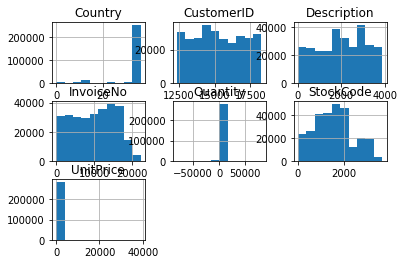

In [5]:
train_df.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022CD24CAB08>,
      dtype=object)

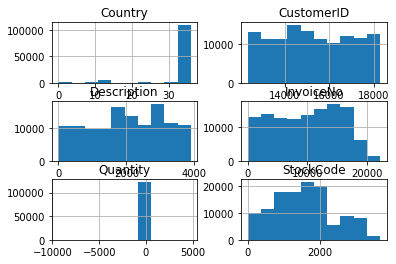

In [6]:
test_df.hist()

In [7]:
train_df.drop_duplicates(keep=False, inplace=True)

In [8]:
train_df['Quantity'] = train_df['Quantity'].abs()
test_df['Quantity'] = test_df['Quantity'].abs()

In [9]:
train_df = train_df.drop(['InvoiceDate'], axis=1)
test_df = test_df.drop(['InvoiceDate'], axis=1)

In [10]:
train_df

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
0,6141,1583,144,3,3.75,14056.0,35
1,6349,1300,3682,6,1.95,13098.0,35
2,16783,2178,1939,4,5.95,15044.0,35
4,6080,1210,2886,12,1.65,13952.0,35
5,17388,495,3247,5,1.65,15351.0,35
...,...,...,...,...,...,...,...
284775,3408,1706,1081,6,1.65,17965.0,35
284776,13982,2184,2947,16,0.65,16793.0,35
284777,6641,667,3632,4,8.50,14755.0,35
284778,13820,1576,3089,48,3.45,14866.0,35


In [11]:
train_df.corr().sort_values("UnitPrice", axis = 0, ascending = False)

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
UnitPrice,0.008063,0.020199,-0.000409,-0.001017,1.000000,-0.004905,-0.005318
StockCode,0.086606,1.000000,-0.013269,0.002128,0.020199,0.003776,0.006420
InvoiceNo,1.000000,0.086606,0.024130,0.002281,0.008063,-0.007251,0.005122
Description,0.024130,-0.013269,1.000000,0.000797,-0.000409,-0.004957,-0.014520
Quantity,0.002281,0.002128,0.000797,1.000000,-0.001017,-0.004623,-0.006665
CustomerID,-0.007251,0.003776,-0.004957,-0.004623,-0.004905,1.000000,0.389762
Country,0.005122,0.006420,-0.014520,-0.006665,-0.005318,0.389762,1.000000


In [12]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
InvoiceNo,279687.0,9943.772124,5543.587546,0.0,5071.00,10280.00,14631.00,22188.0
StockCode,279687.0,1574.021310,844.001204,0.0,942.00,1522.00,2106.00,3683.0
Description,279687.0,2024.470651,1090.126777,0.0,1141.00,1987.00,2945.00,3895.0
Quantity,279687.0,13.831090,297.684036,1.0,2.00,6.00,12.00,80995.0
UnitPrice,279687.0,3.469659,79.109387,0.0,1.25,1.95,3.75,38970.0
CustomerID,279687.0,15279.072359,1714.933703,12346.0,13928.00,15142.00,16788.00,18287.0
Country,279687.0,32.788925,6.791948,0.0,35.00,35.00,35.00,36.0


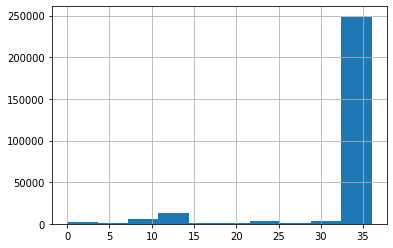

In [13]:
train_df['Country'].hist()

In [14]:
rslt_df = train_df.loc[train_df['Country'] < 35] 
rslt_df.shape

(31288, 7)

In [15]:
rslt_df = pd.DataFrame(np.repeat(rslt_df.values,2,axis=0))
rslt_df.shape

(62576, 7)

In [16]:
rslt_df.columns = train_df.columns

In [17]:
rslt_df

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
0,3140.0,1508.0,3495.0,30.0,1.65,14646.0,23.0
1,3140.0,1508.0,3495.0,30.0,1.65,14646.0,23.0
2,262.0,787.0,2601.0,24.0,0.42,12686.0,13.0
3,262.0,787.0,2601.0,24.0,0.42,12686.0,13.0
4,20652.0,3131.0,1576.0,36.0,1.06,12431.0,0.0
...,...,...,...,...,...,...,...
62571,9792.0,3137.0,3103.0,60.0,1.45,12763.0,19.0
62572,6022.0,937.0,3393.0,12.0,0.42,14911.0,10.0
62573,6022.0,937.0,3393.0,12.0,0.42,14911.0,10.0
62574,7727.0,970.0,727.0,12.0,1.65,17828.0,22.0


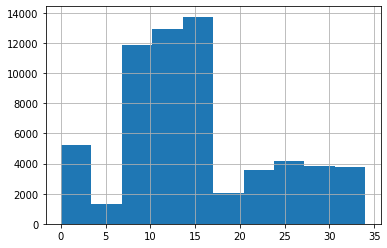

In [18]:
rslt_df['Country'].hist()

In [19]:
train = train_df.append(rslt_df)

In [20]:
train_df.shape

(279687, 7)

In [21]:
train_df.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
0,6141,1583,144,3,3.75,14056.0,35
1,6349,1300,3682,6,1.95,13098.0,35
2,16783,2178,1939,4,5.95,15044.0,35
4,6080,1210,2886,12,1.65,13952.0,35
5,17388,495,3247,5,1.65,15351.0,35


In [22]:
train_df['InvoiceNo']=train_df['InvoiceNo'].astype(str)
train_df['StockCode']=train_df['StockCode'].astype(str)
train_df['Description']=train_df['Description'].astype(str)
train_df['CustomerID']=train_df['CustomerID'].astype(str)
train_df['Country']=train_df['Country'].astype(str)
train_df['Quantity']=train_df['Quantity'].astype(int)

In [23]:
test_df['InvoiceNo']=test_df['InvoiceNo'].astype(str)
test_df['StockCode']=test_df['StockCode'].astype(str)
test_df['Description']=test_df['Description'].astype(str)
test_df['CustomerID']=test_df['CustomerID'].astype(str)
test_df['Country']=test_df['Country'].astype(str)

In [24]:
Y = train_df['UnitPrice']
X = train_df.drop(['UnitPrice'], axis=1)

In [25]:
from catboost import CatBoostRegressor
#Evalution Metrix
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error

In [26]:
reg = {
"CatBoostRegressor":CatBoostRegressor()
}

In [27]:
%%time

model = CatBoostRegressor(depth=4, iterations=600, learning_rate=0.13089,loss_function='RMSE')

model.fit(X, Y)
y_test_pre = model.predict(test_df)
y_train_pre = model.predict(X)

# Print the evalution metrics for model
print("-----Training Data Evalution-----")
print("R2 Value: ", r2_score(Y, y_train_pre))
print("MAE Value: ", mean_absolute_error(Y, y_train_pre))
print("RMSE: ",np.sqrt(mean_squared_error(Y, y_train_pre)))

0:	learn: 78.4386876	total: 69.8ms	remaining: 41.8s
1:	learn: 77.9042002	total: 87.5ms	remaining: 26.2s
2:	learn: 77.3690947	total: 105ms	remaining: 21s
3:	learn: 76.9475424	total: 123ms	remaining: 18.4s
4:	learn: 75.1584073	total: 143ms	remaining: 17s
5:	learn: 74.9479521	total: 161ms	remaining: 15.9s
6:	learn: 74.5753231	total: 179ms	remaining: 15.2s
7:	learn: 74.4286330	total: 197ms	remaining: 14.6s
8:	learn: 74.2151287	total: 216ms	remaining: 14.2s
9:	learn: 72.0951728	total: 236ms	remaining: 13.9s
10:	learn: 70.0695749	total: 258ms	remaining: 13.8s
11:	learn: 69.6508340	total: 285ms	remaining: 14s
12:	learn: 67.7133116	total: 305ms	remaining: 13.8s
13:	learn: 67.5366591	total: 324ms	remaining: 13.5s
14:	learn: 67.4139852	total: 342ms	remaining: 13.3s
15:	learn: 65.5420539	total: 360ms	remaining: 13.1s
16:	learn: 65.4132178	total: 378ms	remaining: 13s
17:	learn: 63.6114144	total: 396ms	remaining: 12.8s
18:	learn: 61.8783956	total: 414ms	remaining: 12.7s
19:	learn: 60.2122274	total:

In [1]:
#We can see that the RMSE Score achieved is 14.25!

## Saving The Model

In [28]:
prediction = {'UnitPrice': y_test_pre}

In [29]:
final = pd.DataFrame(prediction)
final

,UnitPrice
0,3.808402
1,3.141738
2,1.758633
3,3.902130
4,3.835587
...,...
122044,1.688666
122045,1.179734
122046,2.352268
122047,5.606655


In [30]:
# saving the final output informateion to the .CSV file 
#final.to_csv("Submission.csv", index=False)